# Porto Kaggle Competition on Prediction Insurance Claims
---

### Load Data

In [1]:
# import
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load data
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

print(train.shape)
print(test.shape)

(595212, 59)
(892816, 58)


In [3]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [4]:
test.head()

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,0,1,8,1,0,0,1,0,0,...,1,1,1,12,0,1,1,0,0,1
1,1,4,2,5,1,0,0,0,0,1,...,2,0,3,10,0,0,1,1,0,1
2,2,5,1,3,0,0,0,0,0,1,...,4,0,2,4,0,0,0,0,0,0
3,3,0,1,6,0,0,1,0,0,0,...,5,1,0,5,1,0,1,0,0,0
4,4,5,1,7,0,0,0,0,0,1,...,4,0,0,4,0,1,1,0,0,1


### Visualization -  `target`

0    573518
1     21694
Name: target, dtype: int64


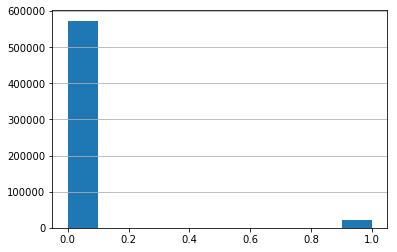

In [5]:
train.target.hist(grid="off");
plt.grid(axis="y")
# 1: claim filed
# 0: no claims
print(train.target.value_counts())

---
# Training

In [8]:
# import
from datetime import datetime
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier

In [9]:
# split input and label
test_id = test.id

X_train = train.copy()
y_train = train.target
X_train.drop("id", axis=1, inplace=True)
X_train.drop("target", axis=1, inplace=True)

X_test = test.copy()
X_test.drop("id", axis=1, inplace=True)

In [10]:
print(X_train.shape, y_train.shape)
print(X_test.shape)

(595212, 57) (595212,)
(892816, 57)


### XGBoost

In [12]:
# train
clf_xgb = XGBClassifier(n_jobs=-1, random_state=42, n_estimators=100, silent=False)
clf_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=False, subsample=1)

In [22]:
# predict
clf_xgb_pred = clf_xgb.predict_proba(X_test)[:,1]

In [24]:
# submission
pd.DataFrame({
    "id": test_id,
    "target": clf_xgb_pred
}).to_csv("submission/clf_xgb_basic_{}.csv".format(str(datetime.now())), index=False)